In [1]:
import pandas as pd
from utils_data import GEFcomLoadLoader, create_load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import date, timedelta
import calendar

def get_us_federal_holidays(year):
    """Return a dictionary of US federal holidays for a given year."""
    holidays = {}

    # Fixed-date holidays
    holidays[date(year, 1, 1)] = 1 #"New Year's Day"
    holidays[date(year, 7, 4)] = 1 #"Independence Day"
    holidays[date(year, 11, 11)] = 1 #"Veterans Day"
    holidays[date(year, 12, 25)] = 1 #"Christmas Day"

    # Movable holidays
    def nth_weekday(n, weekday, month):
        """Return date of the nth weekday in a given month."""
        first_day = date(year, month, 1)
        first_weekday = (weekday - first_day.weekday() + 7) % 7
        return first_day + timedelta(days=first_weekday + (n - 1) * 7)

    def last_weekday(weekday, month):
        """Return date of the last weekday in a given month."""
        last_day = date(year, month, calendar.monthrange(year, month)[1])
        offset = (last_day.weekday() - weekday + 7) % 7
        return last_day - timedelta(days=offset)

    holidays[nth_weekday(3, 0, 1)] = 1 #"Birthday of Martin Luther King, Jr."  # 3rd Monday Jan
    holidays[nth_weekday(3, 0, 2)] = 1 #"Washington's Birthday (Presidents’ Day)"  # 3rd Mon Feb
    holidays[last_weekday(0, 5)] = 1 #"Memorial Day"  # Last Mon May
    holidays[nth_weekday(1, 0, 9)] = 1 #"Labor Day"  # 1st Mon Sep
    holidays[nth_weekday(2, 0, 10)] = 1 #"Columbus Day"  # 2nd Mon Oct
    holidays[nth_weekday(4, 3, 11)] = 1 #"Thanksgiving Day"  # 4th Thu Nov

    return holidays


def label_holidays(df, date_col):
    """Label US federal holidays in a DataFrame based on the date column."""
    df['Holiday'] = 0
    years = df[date_col].dt.year.unique()

    # Build holiday dictionaries for all years in the data
    holiday_map = {}
    for y in years:
        holiday_map.update(get_us_federal_holidays(y))

    # Map holidays
    df['Holiday'] = df[date_col].dt.date.map(holiday_map)
    return df


In [3]:
dataset = create_load_dataset()
# dataset = label_holidays(dataset, 'TIMESTAMP')
# dataset = dataset.fillna(0)

In [4]:
dataset = dataset.set_index('TIMESTAMP')
dataset = dataset.sort_index()

In [5]:
first_date, last_date = dataset.index[0], dataset.index[-1]
first_date, last_date

(Timestamp('2005-01-01 01:00:00'), Timestamp('2011-12-09 23:00:00'))

In [6]:
len(set(dataset.index.date))

2408

<Axes: title={'center': 'Daily Average LOAD'}, xlabel='Time', ylabel='Load'>

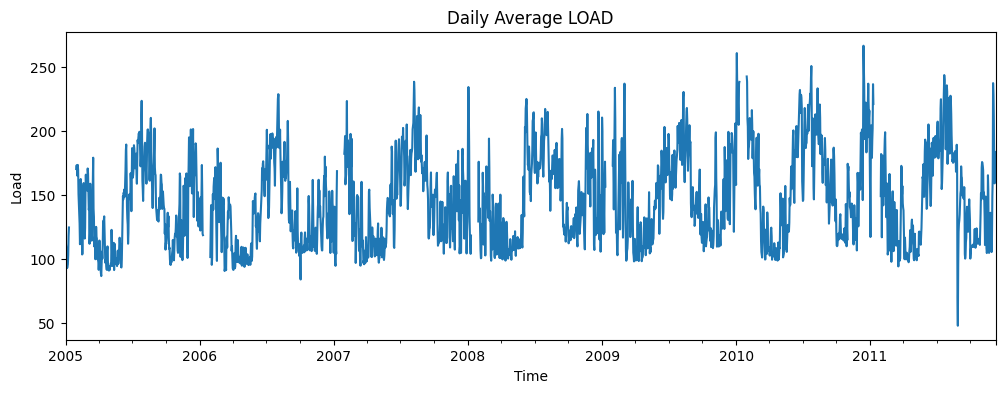

In [7]:
dataset.resample("D")["LOAD"].mean().plot(figsize=(12,4), title="Daily Average LOAD", xlabel="Time", ylabel="Load")


<Axes: title={'center': 'Daily Average Temperature'}, xlabel='Time', ylabel='Temperature'>

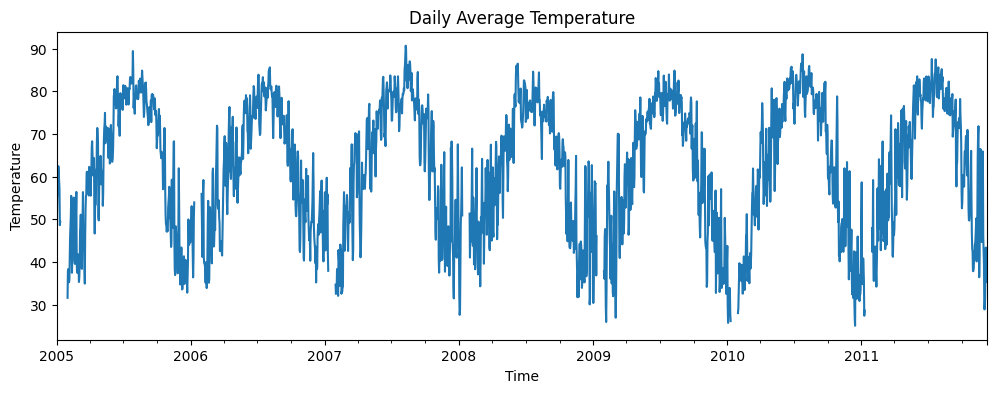

In [8]:
dataset.resample("D")["w1"].mean().plot(figsize=(12,4), title="Daily Average Temperature", xlabel="Time", ylabel="Temperature")

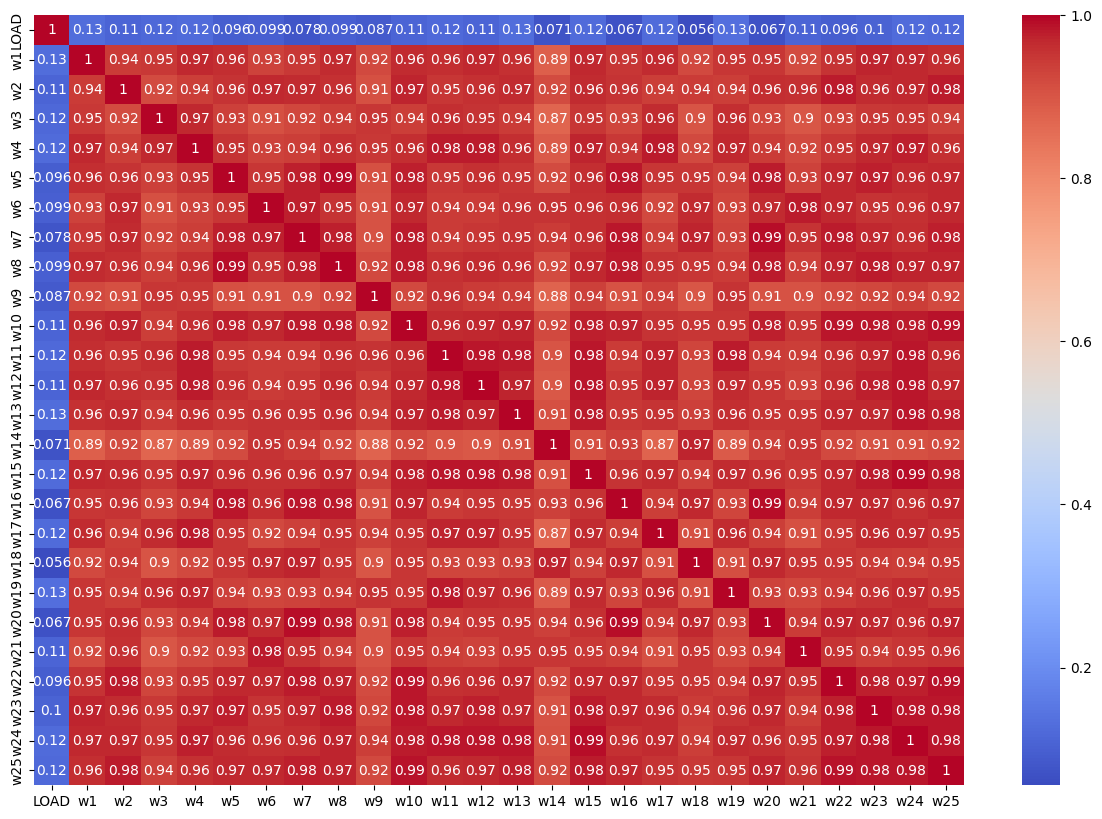

In [9]:
correleations = dataset.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correleations, annot=True, cmap="coolwarm")
plt.show()

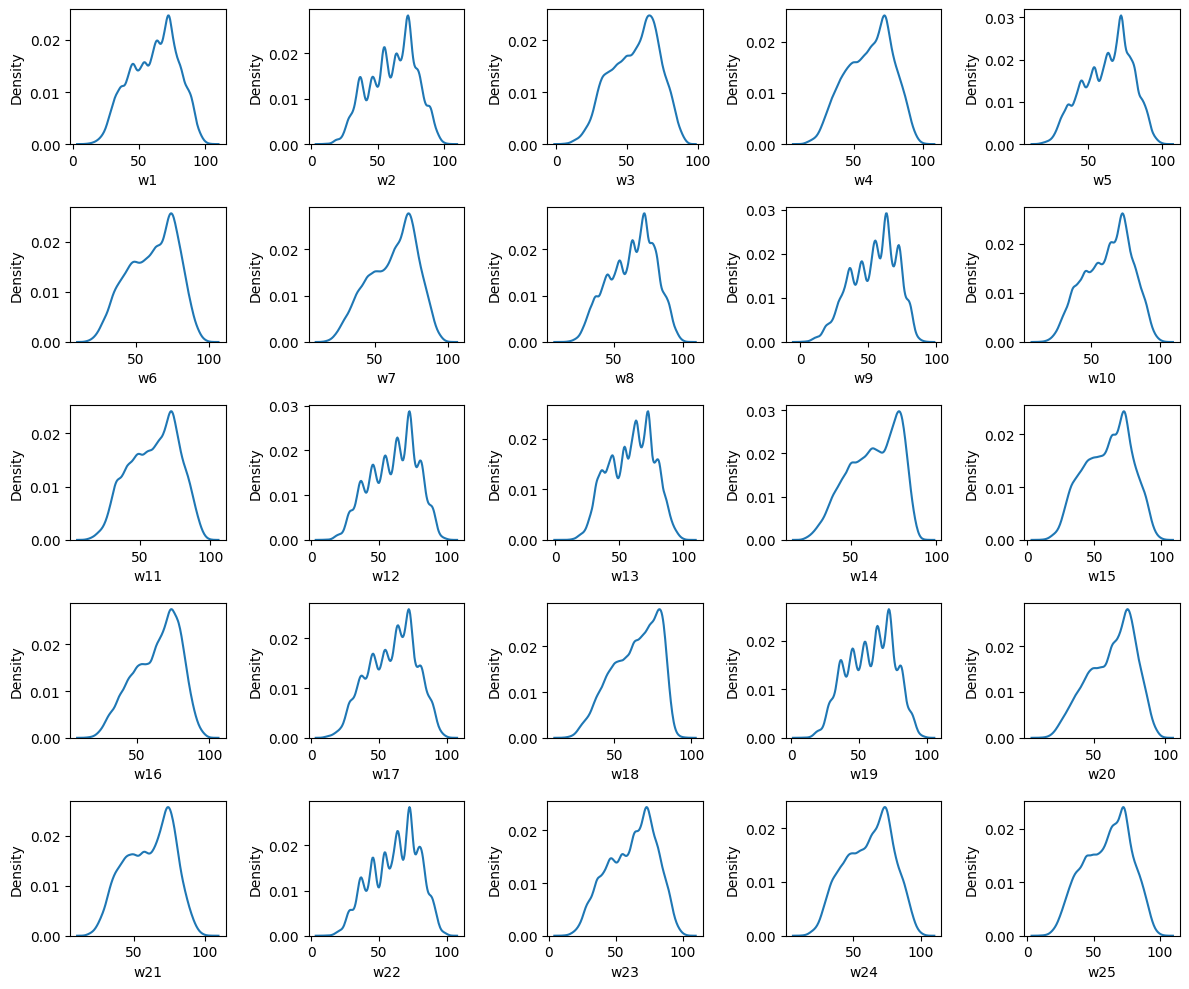

In [10]:
features = ['w' + str(i) for i in range(1, 26)]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12,10))

axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.kdeplot(data=dataset, x=feature, ax=ax)

plt.tight_layout()
plt.show()

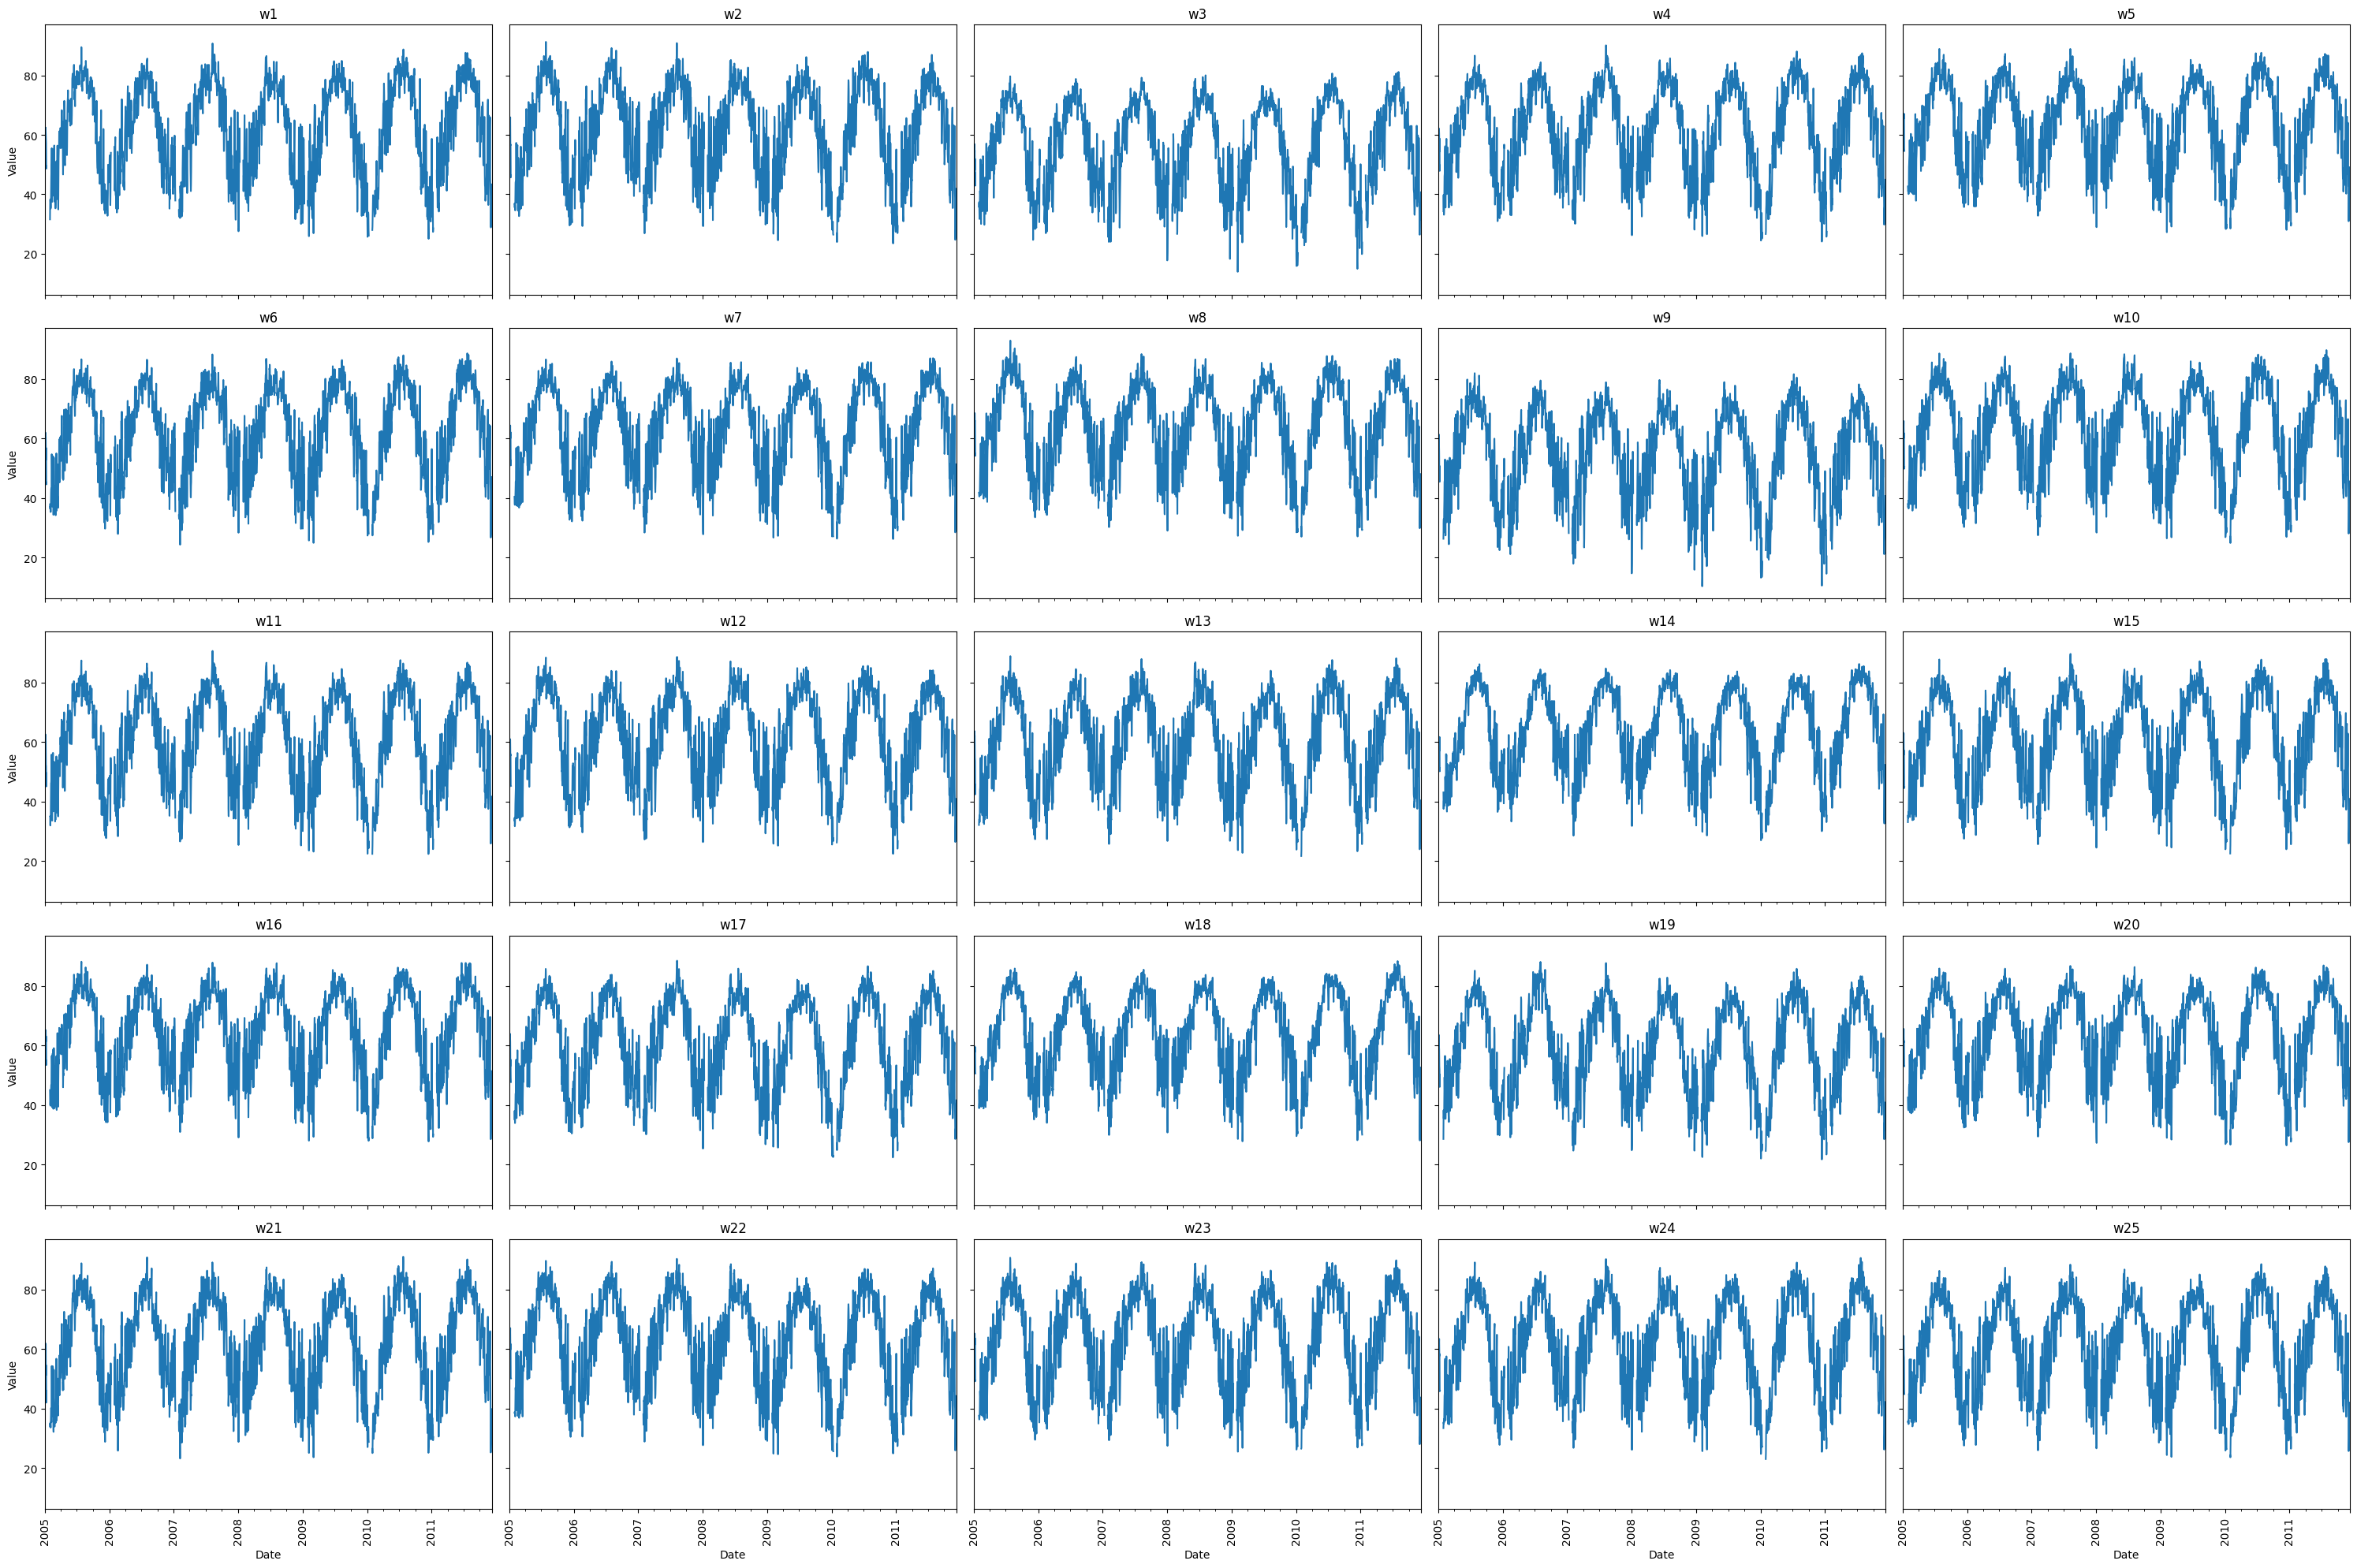

In [17]:
import matplotlib.pyplot as plt

# List of feature names
features = ['w' + str(i) for i in range(1, 26)]

# Create 5x5 subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30, 20), sharex=True, sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over features and axes
for ax, feature in zip(axes, features):
    dataset.resample("D")[feature].mean().plot(ax=ax)
    ax.set_title(feature)
    ax.tick_params(axis="x", rotation=90)  # rotate x-axis labels
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")

plt.tight_layout()
plt.show()


<Axes: xlabel='w1', ylabel='LOAD'>

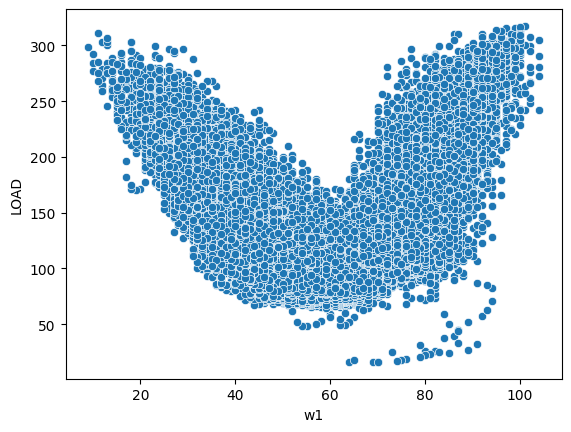

In [12]:
sns.scatterplot(data=dataset, x="w1", y="LOAD")

In [13]:
# import matplotlib.pyplot as plt

# # Resample daily
# daily_load = dataset.resample("D")["LOAD"].mean()
# holiday_load = dataset.resample("D")["Holiday"].mean()
# holiday_index = holiday_load[holiday_load == 1].index

# # Plot all data
# fig, ax = plt.subplots(figsize=(12, 4))
# ax.plot(daily_load.index, daily_load.values, label="Daily Avg Load", color="blue")

# # Add vertical lines for holidays
# for h in holiday_index:
#     ax.axvline(x=h, color="red", ls="--", alpha=0.7)

# ax.set_title("Daily Average LOAD")
# ax.set_xlabel("Time")
# ax.set_ylabel("Load")
# ax.legend(["Daily Avg Load", "Holiday"])
# plt.show()
